# Libraries

In [ ]:
import geopandas as gpd
import pandas as pd
from shapely import wkt
import json
import pandas as pd
import osmnx as ox
import matplotlib.pyplot as plt
import osmnx as ox
import networkx as nx
import GOSTnets as gn
import numpy as np
import datetime
import logging

In [ ]:
timestamp = datetime.now().strftime("%Y%m%d%H%M%S")
timestamp

In [1144]:
import logging

timestamp = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
log_filename = f"RutasCusco_{timestamp}.log"

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s :: %(levelname)s :: %(name)s :: %(process)d :: %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S',
    handlers=[
#         logging.FileHandler(log_filename),
        logging.StreamHandler()
    ]
)
logger = logging.getLogger('MAIN')

In [1143]:
logging.root.handlers = []

# Mapa Cusco

In [ ]:
perushape = gpd.read_file("../../Turismo/shapes/peru.shp")
perushape.head()

In [ ]:

# cuscoshape = perushape[perushape['provincia'].isin(['CUSCO', 'QUISPICANCHI'])]
cuscoshape = perushape[perushape['provincia'].isin(['CUSCO'])]

cuscoshape.head()

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))

cuscoshape.plot(alpha=0.6, ax=ax, column='provincia')
# gdf.plot(ax=ax)

In [ ]:
mask = perushape['departamen'] == 'CUSCO'

print(np.sort(list(perushape[mask]['provincia'].unique())))

print(np.sort(list(perushape[mask]['distrito'].unique())))

# Grafo Cusco

In [ ]:
%%time

place_name = ["Provincia de Cusco, Cusco, Peru"]
graph = ox.graph_from_place(place_name, which_result=1, network_type='drive')

In [ ]:
fig, ax = ox.plot_graph(graph, bgcolor='white', node_color='blue', edge_color='green', figsize=(30,30))

In [ ]:
print(nx.info(graph))

In [ ]:
type(nodes)

In [ ]:
%%time
nodes, edges = ox.graph_to_gdfs(graph)

In [ ]:
nodes.head()

In [ ]:
edges.head()

In [ ]:
nodes.plot(figsize = (10,10))

In [ ]:
edges.shape

In [ ]:
fig

In [ ]:
nodes.to_csv("data/GrafoCusco_nodes.csv")

In [ ]:
edges.to_csv("data/GrafoCusco_edges.csv")

# RutasCusco

In [ ]:
rutascusco = pd.read_csv("data/RutasCusco.csv")
rutascusco.head()

In [ ]:
rutascusco = gpd.GeoDataFrame(
    rutascusco, geometry = gpd.points_from_xy(rutascusco.longitud, rutascusco.latitud), crs="EPSG:4326"
)
rutascusco.head()

In [ ]:
fig, ax = plt.subplots(figsize=(25,25))
rutas = ['c4m']
rutascusco.query('ruta in @rutas').plot(ax=ax)

In [ ]:
cusco_transporte = rutascusco.dissolve(by='ruta').reset_index()
cusco_transporte

In [ ]:
cusco_transporte.plot()

In [ ]:
fig, ax = plt.subplots(figsize=(25,25))
rutas = ['Tupac Amaru']
cusco_transporte.query('ruta in @rutas').plot(ax=ax)

In [ ]:
import plotly.express as px

In [ ]:
geo_df

In [ ]:
# %%time
# geo_df = cuscoshape
# fig = px.choropleth(geo_df, 
#                     geojson=geo_df.geometry, 
#                     locations=geo_df.index,
#                     color='distrito'
#                    )
# fig.update_geos(fitbounds="locations", visible=False)
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# fig.show()

In [ ]:
# import plotly.express as px
# import geopandas as gpd

# df = px.data.election()
# geo_df = gpd.GeoDataFrame.from_features(
#     px.data.election_geojson()["features"]
# ).merge(df, on="district").set_index("district")


In [ ]:

# fig = px.choropleth(geo_df,
#                    geojson=geo_df.geometry,
#                    locations=geo_df.index,
#                    color="Joly",
#                    projection="mercator")
# fig.update_geos(fitbounds="locations", visible=False)
# fig.show()

In [ ]:
%%time
fig, ax = plt.subplots(figsize=(15,15))

fig, ax = ox.plot_graph(graph, ax=ax, bgcolor='white', node_color='blue', edge_color='green')
cuscoshape.plot(alpha=0.6, ax=ax, column='provincia')
gdf.plot(ax=ax, color='red')

# fig

# Grafo Cusco ovelay con Rutas Cusco

In [ ]:
%%time
cusco_transporte_points = gpd.overlay(edges, cusco_transporte, keep_geom_type=False)

In [ ]:
cusco_transporte.head()

# RutasCusco y su nodo en el grafo cusco mas cercano

In [ ]:
rutascusco.head()

In [ ]:
rutascusco.shape

In [ ]:
rutascuscounique = rutascusco.drop_duplicates()
rutascuscounique.shape

In [ ]:
rutascuscounique.plot()

In [ ]:
rutascuscounique[rutascuscounique.duplicated()]

In [1088]:
rutascuscounique

,latitud,longitud,direccion,ruta,geometry
0,-13.540800,-71.886600,s,c4m,POINT (-71.88660 -13.54080)
1,-13.540700,-71.886800,s,c4m,POINT (-71.88680 -13.54070)
2,-13.540700,-71.887200,s,c4m,POINT (-71.88720 -13.54070)
3,-13.541200,-71.887500,s,c4m,POINT (-71.88750 -13.54120)
4,-13.541800,-71.887700,s,c4m,POINT (-71.88770 -13.54180)
...,...,...,...,...,...
50467,-13.543888,-71.985000,b,Huancaro,POINT (-71.98500 -13.54389)
50468,-13.544040,-71.985146,b,Huancaro,POINT (-71.98515 -13.54404)
50469,-13.544587,-71.985600,b,Huancaro,POINT (-71.98560 -13.54459)
50470,-13.545175,-71.986145,b,Huancaro,POINT (-71.98614 -13.54518)


## Snap

In [ ]:
%%time
logger.info("Proceso SNAP Inicio")
rutascuscounique_gnodes = gn.pandana_snap_points( rutascuscounique , nodes )
rutascuscounique_gnodes
logger.info("Proceso SNAP Fin")

In [ ]:
rutascuscounique_gnodes.rename(columns={'NN': 'cusco_node', 'NN_dist':'cusco_node_dist'}, inplace=True)
rutascuscounique_gnodes.head()

In [ ]:
rutascuscounique_gnodes.to_csv("data/RutasCusco_snap_CuscoNodes.csv", sep=";")

In [1090]:
rutascuscounique_gnodes.head(2)

,latitud,longitud,direccion,ruta,geometry,cusco_node,cusco_node_dist
0,-13.5408,-71.8866,s,c4m,POINT (-71.88660 -13.54080),1006743598,0.000315
1,-13.5407,-71.8868,s,c4m,POINT (-71.88680 -13.54070),1006743598,0.000132


In [ ]:
rutascuscounique_gnodes2 = rutascuscounique_gnodes.merge(nodes.reset_index(), 
                                                         how='left', 
                                                         left_on='cusco_node', 
                                                         right_on='osmid')

In [1092]:
rutascuscounique_gnodes2.head(3)

,latitud,longitud,direccion,ruta,geometry_x,cusco_node,cusco_node_dist,osmid,y,x,street_count,highway,geometry_y
0,-13.5408,-71.8866,s,c4m,POINT (-71.88660 -13.54080),1006743598,0.000315,1006743598,-13.540767,-71.886914,4,NaN,POINT (-71.88691 -13.54077)
1,-13.5407,-71.8868,s,c4m,POINT (-71.88680 -13.54070),1006743598,0.000132,1006743598,-13.540767,-71.886914,4,NaN,POINT (-71.88691 -13.54077)
2,-13.5407,-71.8872,s,c4m,POINT (-71.88720 -13.54070),7932068807,0.000206,7932068807,-13.540822,-71.887366,3,NaN,POINT (-71.88737 -13.54082)


In [1091]:
# rutascuscounique_gnodes2['geometry'] = rutascuscounique_gnodes2['geometry_y'].apply(wkt.loads)
# gpd.GeoDataFrame(rutascuscounique_gnodes2, geometry='geometry_y').plot()

## Subgrafo Transporte

In [1105]:
subgraph_nodes = rutascuscounique_gnodes2['cusco_node'].unique()
G_transporte = graph.subgraph(subgraph_nodes).copy()

In [1106]:
print(nx.info(G_transporte))

Name: 
Type: MultiDiGraph
Number of nodes: 2517
Number of edges: 4721
Average in degree:   1.8756
Average out degree:   1.8756


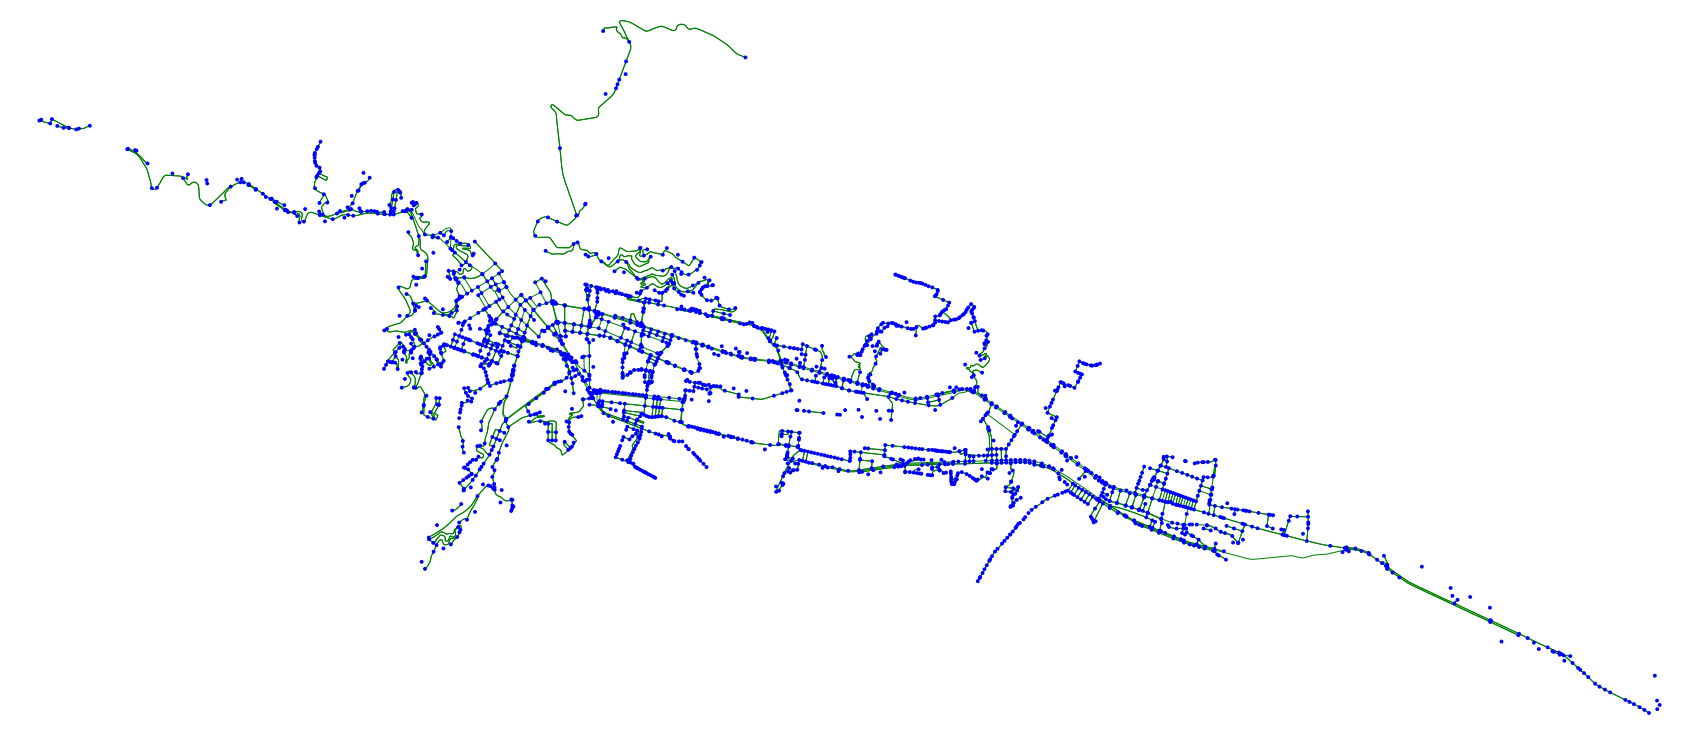

In [1107]:
fig, ax = ox.plot_graph(G_transporte, bgcolor='white', 
                        node_color='blue', 
                        edge_color='green', 
                        figsize=(30,30)
                       )

In [1108]:
G_transporte_isolates = list(nx.isolates(G_transporte))
len(G_transporte_isolates)

154

In [1116]:
print("Number of nodes: %s" % G_transporte.number_of_nodes())
print("Number of isolates %s" % nx.number_of_isolates(G_transporte))

print("Ratio of isolates %.3f" % (nx.number_of_isolates(G_transporte) / G_transporte.number_of_nodes()) )

Number of nodes: 2363
Number of isolates 0
Ratio of isolates 0.000


In [1110]:
G_transporte.remove_nodes_from(G_transporte_isolates)

In [1117]:
print(nx.info(G_transporte))
nx.number_of_isolates(G_transporte)

Name: 
Type: MultiDiGraph
Number of nodes: 2363
Number of edges: 4721
Average in degree:   1.9979
Average out degree:   1.9979


0

In [1113]:
# print(nx.info(graph))

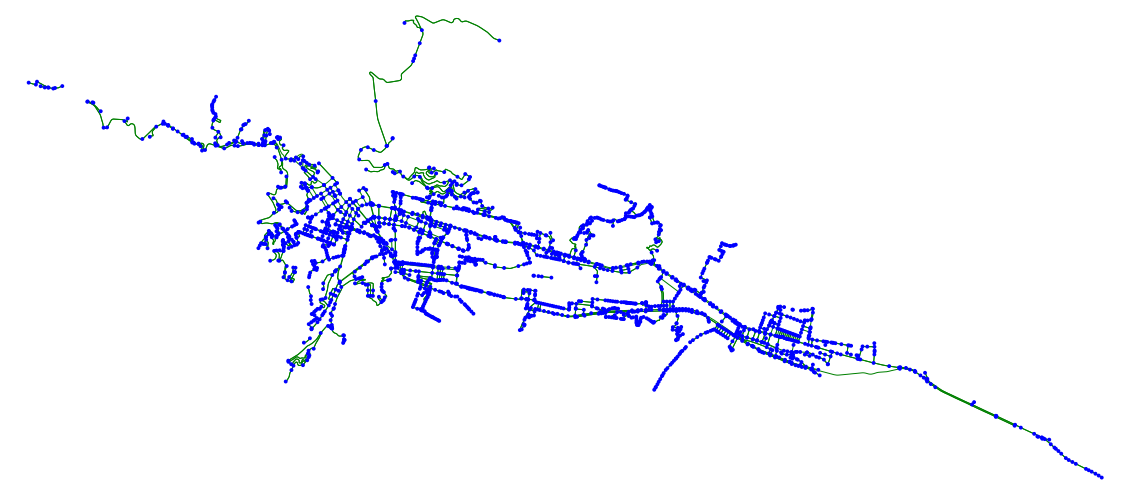

In [1114]:
fig, ax = ox.plot_graph(G_transporte, bgcolor='white', 
                        node_color='blue', 
                        edge_color='green', 
                        figsize=(20,20)
                       )

In [1118]:
G_transporte_nodes, G_transporte_edges = ox.graph_to_gdfs(G_transporte)

In [1119]:
G_transporte_edges.head()

osmid                   name      highway  \
u           v           key                                                   
10232315911 30970895    0     316326176      Avenida Collasuyo    secondary   
            472615572   0     316326176      Avenida Collasuyo    secondary   
10803871753 5601181487  0     586164384                    NaN  residential   
3489865744  30963653    0     379231957  Avenida de la Cultura        trunk   
            10563524054 0    1132987694                    NaN   trunk_link   

                            maxspeed  oneway   length  \
u           v           key                             
10232315911 30970895    0         40   False    9.202   
            472615572   0         40   False   85.249   
10803871753 5601181487  0        NaN   False  142.060   
3489865744  30963653    0        NaN    True  180.332   
            10563524054 0        NaN   False   22.404   

                                                                      geometry  \
u           v           key                                                      
10232315911 30970895    0    LINESTRING (-71.95289 -13.52105, -71.95297 -13...   
            472615572   0    LINESTRING (-71.95289 -13.52105, -71.95233 -13...   
10803871753 5601181487  0    LINESTRING (-71.98694 -13.54986, -71.98684 -13...   
3489865744  30963653    0    LINESTRING (-71.92759 -13.53169, -71.92601 -13...   
            10563524054 0    LINESTRING (-71.92759 -13.53169, -71.92756 -13...   

                            lanes width  ref bridge access junction  
u           v           key                                          
10232315911 30970895    0     NaN   NaN  NaN    NaN    NaN      NaN  
            472615572   0     NaN   NaN  NaN    NaN    NaN      NaN  
10803871753 5601181487  0     NaN   NaN  NaN    NaN    NaN      NaN  
3489865744  30963653    0       3   NaN  NaN    NaN    NaN      NaN  
            10563524054 0       2   NaN  NaN    NaN    NaN      NaN

# WazeRoutCalculator

In [ ]:
import WazeRouteCalculator
import logging

In [ ]:
from_address = '-12.082981, -77.051728' #latitud(y), longitud(x)
to_address = '-12.108989395643071, -77.01606433234396'

route = WazeRouteCalculator.WazeRouteCalculator(from_address, to_address)
route.calc_route_info()

# Calculando Distancia y tiempo con Waze para cada edge del grafo

In [ ]:
edges2 = edges.reset_index()

In [884]:
edges2.head(2)

,u,v,key,osmid,name,highway,oneway,length,geometry,lanes,maxspeed,junction,ref,access,width,bridge
0,30962246,3707257935,0,"[885654808, 4818990, 885654806]",Avenida Velasco Astete,trunk,False,267.284,"LINESTRING (-71.94544 -13.53886, -71.94500 -13...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30962246,30962247,0,893177331,Avenida Velasco Astete,trunk,True,25.109,"LINESTRING (-71.94544 -13.53886, -71.94561 -13...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [960]:
import WazeRouteCalculator
import datetime

def getTimeDelta ():
    """
    hour: hour to leave at
    return: minutes
    """
    now = datetime.datetime.now()
#     target_time = now.replace(hour=hour, minute=0, second=0, microsecond=0)
    target_time = datetime.datetime(2023, 8, 7, 14, 0, 0, 0) #Lunes 07/08 a las 08:00
    time_diff =  target_time - now
    minutes = int(time_diff.total_seconds()/60)
    return minutes, time_diff

def getWazeRouteInfo(node_a, node_b):
    """
    node_a: node origin from graph
    node_b: node destination from graph
    """
    try:
        logger.info(f"Waze info for node_a {node_a} to node_b {node_b} started.")

        point_a_lat, point_a_lon = nodes.loc[node_a,:].geometry.y , nodes.loc[node_a,:].geometry.x
        point_b_lat, point_b_lon = nodes.loc[node_b,:].geometry.y , nodes.loc[node_b,:].geometry.x
        from_address = '%s, %s' % (point_a_lat, point_a_lon)

        to_address = '%s, %s' % (point_b_lat, point_b_lon)
        from_address , to_address

        route = WazeRouteCalculator.WazeRouteCalculator(from_address, to_address)
        
        time_delta, time_diff = getTimeDelta() #Calculamos time_delta para setear las 08:00 del día

        date4waze = datetime.datetime.now() + datetime.timedelta(minutes=time_delta)
        logger.info(f"Fixed traffic date: {date4waze}" )
        
        minutes, distance = route.calc_route_info(time_delta=time_delta)
        
        logger.info(f"Waze info for node_a {node_a} to node_b {node_b} completed.")
    except Exception as e:
        logger.info(f"Error in Waze info for node_a {node_a} to node_b {node_b}.")
        logger.info(e)
        minutes, distance = -1, -1
    return minutes, distance

In [919]:
# datetime.datetime.now() + datetime.timedelta(minutes=a)

In [ ]:
# getWazeRouteInfo?
# 960976345 to node_b 30962247

In [907]:
# 37724 :: Error in Waze info for node_a 5600851249 to node_b 5600851255.
# getWazeRouteInfo(5600851249, 5600851255)

In [1004]:
cond = edges2_wazeinfo['wazeinfo_minutes'] < 0
recupero_index = edges2_wazeinfo[cond].index
recupero_index

Int64Index([   10,    61,   701,   720,  1010,  1302,  2050,  2242,  3076,
             3079,
            ...
            26071, 26100, 26363, 26485, 26969, 26970, 26971, 27079, 27080,
            27081],
           dtype='int64', length=297)

In [973]:
# edges2.iloc[recupero_index, :]
3897/700

5.567142857142857

In [1005]:
%%time
import logging
import pandas as pd
from multiprocessing import Pool, cpu_count

##Logger
logging.root.handlers.clear()
logging.root.handlers

timestamp = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
log_filename = f"logs/CuscoEdgesWaze1400_{timestamp}.log"

logging.basicConfig(
    level=logging.INFO,
    datefmt='%Y-%m-%d %H:%M:%S',
)

logFormatter = logging.Formatter('%(asctime)s :: %(levelname)s :: %(name)s :: %(process)d :: %(message)s')
logger = logging.getLogger()

fileHandler = logging.FileHandler(log_filename)
fileHandler.setFormatter(logFormatter)
logger.addHandler(fileHandler)
##Logger

def process_row(row):
    result = getWazeRouteInfo(row.u, row.v)
    with open('CuscoEdgesWaze1400_Recupero03.txt', 'a') as f:
        linea = f"{row.name};{row.u};{row.v};{result}\n"
        f.write(linea)
    return result

def split_dataframe(df, chunk_size):
    chunks = [df[i:i + chunk_size] for i in range(0, df.shape[0], chunk_size)]
    return chunks

def apply_chunk(chunk):
    return chunk.apply(process_row, axis=1)

# Define the chunk size based on your dataset size and available resources
chunk_size = 300

# inputdf = edges2
inputdf = edges2.iloc[recupero_index, :]

data_chunks = split_dataframe(inputdf, chunk_size)


# Get the number of available CPU cores
# num_cores = cpu_count()
num_cores = int(inputdf.shape[0]/chunk_size)+1
if num_cores > cpu_count():
    num_cores = cpu_count()
print(f"Num Cores --> {num_cores}")

# # Create a multiprocessing pool with the number of cores
with Pool(num_cores) as pool:
    logger.info("Multiprocessing started.")
    results = pool.map(apply_chunk, data_chunks)
    logger.info("Multiprocessing completed.")

# getWazeRouteInfo(10789452176, 10789145984)


Num Cores --> 1


INFO:root:Multiprocessing started.
INFO:root:Waze info for node_a 30962250 to node_b 1428107854 started.
From: -13.5381132, -71.9481827 - to: -13.5370082, -71.9480552
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -13.5381132, -71.9481827 - to: -13.5370082, -71.9480552
Start coords: (-13.5381132, -71.9481827)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:Start coords: (-13.5381132, -71.9481827)
End coords: (-13.5370082, -71.9480552)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:End coords: (-13.5370082, -71.9480552)
INFO:root:Fixed traffic date: 2023-08-07 14:00:18.322048
Time 0.32 minutes, distance 0.12 km.
INFO:WazeRouteCalculator.WazeRouteCalculator:Time 0.32 minutes, distance 0.12 km.
INFO:root:Waze info for node_a 30962250 to node_b 1428107854 completed.
INFO:root:Waze info for node_a 30962463 to node_b 1428480825 started.
From: -13.5406105, -71.9353098 - to: -13.5397053, -71.9351085
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -13.5406105, -71.9353098 - to: -13.5397053,

INFO:WazeRouteCalculator.WazeRouteCalculator:From: -13.5118228, -71.8501808 - to: -13.5214852, -71.8398131
Start coords: (-13.5118228, -71.8501808)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:Start coords: (-13.5118228, -71.8501808)
End coords: (-13.5214852, -71.8398131)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:End coords: (-13.5214852, -71.8398131)
INFO:root:Fixed traffic date: 2023-08-07 14:00:51.642567
INFO:root:Error in Waze info for node_a 968141510 to node_b 968344963.
INFO:root:Internal Error
INFO:root:Waze info for node_a 968141510 to node_b 968141414 started.
From: -13.5118228, -71.8501808 - to: -13.5138529, -71.8628865
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -13.5118228, -71.8501808 - to: -13.5138529, -71.8628865
Start coords: (-13.5118228, -71.8501808)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:Start coords: (-13.5118228, -71.8501808)
End coords: (-13.5138529, -71.8628865)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:End coords: (-13.5138529, -71.862886

INFO:root:Fixed traffic date: 2023-08-07 14:00:10.509537
INFO:root:Error in Waze info for node_a 3094469145 to node_b 3094469342.
INFO:root:Internal Error
INFO:root:Waze info for node_a 3094469145 to node_b 6248072470 started.
From: -13.5982852, -72.0438496 - to: -13.5976584, -72.0471866
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -13.5982852, -72.0438496 - to: -13.5976584, -72.0471866
Start coords: (-13.5982852, -72.0438496)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:Start coords: (-13.5982852, -72.0438496)
End coords: (-13.5976584, -72.0471866)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:End coords: (-13.5976584, -72.0471866)
INFO:root:Fixed traffic date: 2023-08-07 14:00:10.913159
INFO:root:Error in Waze info for node_a 3094469145 to node_b 6248072470.
INFO:root:Internal Error
INFO:root:Waze info for node_a 3094469145 to node_b 6238084280 started.
From: -13.5982852, -72.0438496 - to: -13.5978226, -72.0439215
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -13.5982852,

INFO:root:Waze info for node_a 3094469508 to node_b 6254368838 started.
From: -13.6064191, -72.0436165 - to: -13.6064291, -72.0432333
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -13.6064191, -72.0436165 - to: -13.6064291, -72.0432333
Start coords: (-13.6064191, -72.0436165)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:Start coords: (-13.6064191, -72.0436165)
End coords: (-13.6064291, -72.0432333)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:End coords: (-13.6064291, -72.0432333)
INFO:root:Fixed traffic date: 2023-08-07 14:00:38.286017
INFO:root:Error in Waze info for node_a 3094469508 to node_b 6254368838.
INFO:root:Internal Error
INFO:root:Waze info for node_a 3094469508 to node_b 6254368842 started.
From: -13.6064191, -72.0436165 - to: -13.6063523, -72.0440018
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -13.6064191, -72.0436165 - to: -13.6063523, -72.0440018
Start coords: (-13.6064191, -72.0436165)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:Start coords: (-13.60641

DEBUG:WazeRouteCalculator.WazeRouteCalculator:End coords: (-13.5446346, -71.954345)
INFO:root:Fixed traffic date: 2023-08-07 14:00:02.255977
Time 0.05 minutes, distance 0.04 km.
INFO:WazeRouteCalculator.WazeRouteCalculator:Time 0.05 minutes, distance 0.04 km.
INFO:root:Waze info for node_a 3707242426 to node_b 3707242425 completed.
INFO:root:Waze info for node_a 3710828143 to node_b 3710828142 started.
From: -13.5295868, -71.955332 - to: -13.5300872, -71.9554363
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -13.5295868, -71.955332 - to: -13.5300872, -71.9554363
Start coords: (-13.5295868, -71.955332)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:Start coords: (-13.5295868, -71.955332)
End coords: (-13.5300872, -71.9554363)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:End coords: (-13.5300872, -71.9554363)
INFO:root:Fixed traffic date: 2023-08-07 14:00:02.670581
Time 0.00 minutes, distance 0.00 km.
INFO:WazeRouteCalculator.WazeRouteCalculator:Time 0.00 minutes, distance 0.00 km.
I

INFO:root:Waze info for node_a 4928113270 to node_b 4928113276 started.
From: -13.5845885, -72.0590081 - to: -13.5850534, -72.0590785
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -13.5845885, -72.0590081 - to: -13.5850534, -72.0590785
Start coords: (-13.5845885, -72.0590081)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:Start coords: (-13.5845885, -72.0590081)
End coords: (-13.5850534, -72.0590785)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:End coords: (-13.5850534, -72.0590785)
INFO:root:Fixed traffic date: 2023-08-07 14:00:21.533529
INFO:root:Error in Waze info for node_a 4928113270 to node_b 4928113276.
INFO:root:Internal Error
INFO:root:Waze info for node_a 4928113446 to node_b 6248072470 started.
From: -13.5863485, -72.0598928 - to: -13.5976584, -72.0471866
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -13.5863485, -72.0598928 - to: -13.5976584, -72.0471866
Start coords: (-13.5863485, -72.0598928)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:Start coords: (-13.58634

INFO:WazeRouteCalculator.WazeRouteCalculator:From: -13.5437254, -72.0313663 - to: -13.5424582, -72.032918
Start coords: (-13.5437254, -72.0313663)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:Start coords: (-13.5437254, -72.0313663)
End coords: (-13.5424582, -72.032918)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:End coords: (-13.5424582, -72.032918)
INFO:root:Fixed traffic date: 2023-08-07 14:00:06.581310
INFO:root:Error in Waze info for node_a 6193842618 to node_b 6206850271.
INFO:root:Internal Error
INFO:root:Waze info for node_a 6193842681 to node_b 10789356470 started.
From: -13.5435972, -72.0294645 - to: -13.5434218, -72.0298648
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -13.5435972, -72.0294645 - to: -13.5434218, -72.0298648
Start coords: (-13.5435972, -72.0294645)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:Start coords: (-13.5435972, -72.0294645)
End coords: (-13.5434218, -72.0298648)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:End coords: (-13.5434218, -72.0298

DEBUG:WazeRouteCalculator.WazeRouteCalculator:Start coords: (-13.5886635, -71.9260143)
End coords: (-13.5895181, -71.9273634)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:End coords: (-13.5895181, -71.9273634)
INFO:root:Fixed traffic date: 2023-08-07 14:00:32.785024
INFO:root:Error in Waze info for node_a 6238246991 to node_b 6238246990.
INFO:root:Internal Error
INFO:root:Waze info for node_a 6238246991 to node_b 6238246981 started.
From: -13.5886635, -71.9260143 - to: -13.5881264, -71.9262933
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -13.5886635, -71.9260143 - to: -13.5881264, -71.9262933
Start coords: (-13.5886635, -71.9260143)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:Start coords: (-13.5886635, -71.9260143)
End coords: (-13.5881264, -71.9262933)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:End coords: (-13.5881264, -71.9262933)
INFO:root:Fixed traffic date: 2023-08-07 14:00:35.574789
INFO:root:Error in Waze info for node_a 6238246991 to node_b 6238246981.
INFO:root:I

Start coords: (-13.6053363, -72.044447)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:Start coords: (-13.6053363, -72.044447)
End coords: (-13.6059359, -72.0435834)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:End coords: (-13.6059359, -72.0435834)
INFO:root:Fixed traffic date: 2023-08-07 14:00:11.529172
INFO:root:Error in Waze info for node_a 6254368834 to node_b 6254368836.
INFO:root:Internal Error
INFO:root:Waze info for node_a 6254368834 to node_b 6254368829 started.
From: -13.6053363, -72.044447 - to: -13.6051486, -72.0448681
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -13.6053363, -72.044447 - to: -13.6051486, -72.0448681
Start coords: (-13.6053363, -72.044447)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:Start coords: (-13.6053363, -72.044447)
End coords: (-13.6051486, -72.0448681)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:End coords: (-13.6051486, -72.0448681)
INFO:root:Fixed traffic date: 2023-08-07 14:00:12.193101
INFO:root:Error in Waze info for node_a 625436883

DEBUG:WazeRouteCalculator.WazeRouteCalculator:Start coords: (-13.6122715, -72.0590567)
End coords: (-13.5976584, -72.0471866)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:End coords: (-13.5976584, -72.0471866)
INFO:root:Fixed traffic date: 2023-08-07 14:00:34.051550
INFO:root:Error in Waze info for node_a 6318831859 to node_b 6248072470.
INFO:root:Internal Error
INFO:root:Waze info for node_a 6356426059 to node_b 6356426937 started.
From: -13.5766323, -72.1429525 - to: -13.5973934, -72.153074
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -13.5766323, -72.1429525 - to: -13.5973934, -72.153074
Start coords: (-13.5766323, -72.1429525)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:Start coords: (-13.5766323, -72.1429525)
End coords: (-13.5973934, -72.153074)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:End coords: (-13.5973934, -72.153074)
INFO:root:Fixed traffic date: 2023-08-07 14:00:34.482223
INFO:root:Error in Waze info for node_a 6356426059 to node_b 6356426937.
INFO:root:Inter

Start coords: (-13.5740081, -72.1066159)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:Start coords: (-13.5740081, -72.1066159)
End coords: (-13.573869, -72.1081388)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:End coords: (-13.573869, -72.1081388)
INFO:root:Fixed traffic date: 2023-08-07 14:00:10.760698
INFO:root:Error in Waze info for node_a 7438351786 to node_b 5700455262.
INFO:root:Internal Error
INFO:root:Waze info for node_a 8236942848 to node_b 10809702402 started.
From: -13.5479238, -71.8575916 - to: -13.5493208, -71.855501
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -13.5479238, -71.8575916 - to: -13.5493208, -71.855501
Start coords: (-13.5479238, -71.8575916)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:Start coords: (-13.5479238, -71.8575916)
End coords: (-13.5493208, -71.855501)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:End coords: (-13.5493208, -71.855501)
INFO:root:Fixed traffic date: 2023-08-07 14:00:11.246755
INFO:root:Error in Waze info for node_a 82369428

INFO:root:Waze info for node_a 10786525629 to node_b 10798241120 started.
From: -13.5912499, -71.925711 - to: -13.5913157, -71.9268996
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -13.5912499, -71.925711 - to: -13.5913157, -71.9268996
Start coords: (-13.5912499, -71.925711)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:Start coords: (-13.5912499, -71.925711)
End coords: (-13.5913157, -71.9268996)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:End coords: (-13.5913157, -71.9268996)
INFO:root:Fixed traffic date: 2023-08-07 14:00:54.716059
INFO:root:Error in Waze info for node_a 10786525629 to node_b 10798241120.
INFO:root:Internal Error
INFO:root:Waze info for node_a 10786525629 to node_b 10774913065 started.
From: -13.5912499, -71.925711 - to: -13.5911616, -71.9256898
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -13.5912499, -71.925711 - to: -13.5911616, -71.9256898
Start coords: (-13.5912499, -71.925711)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:Start coords: (-13.591249

Start coords: (-13.5217374, -72.0178771)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:Start coords: (-13.5217374, -72.0178771)
End coords: (-13.5226378, -72.0178556)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:End coords: (-13.5226378, -72.0178556)
INFO:root:Fixed traffic date: 2023-08-07 14:00:29.822583
INFO:root:Error in Waze info for node_a 11047357300 to node_b 6199445439.
INFO:root:Internal Error
INFO:root:Waze info for node_a 11047357300 to node_b 10783567128 started.
From: -13.5217374, -72.0178771 - to: -13.5233036, -72.0123407
INFO:WazeRouteCalculator.WazeRouteCalculator:From: -13.5217374, -72.0178771 - to: -13.5233036, -72.0123407
Start coords: (-13.5217374, -72.0178771)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:Start coords: (-13.5217374, -72.0178771)
End coords: (-13.5233036, -72.0123407)
DEBUG:WazeRouteCalculator.WazeRouteCalculator:End coords: (-13.5233036, -72.0123407)
INFO:root:Fixed traffic date: 2023-08-07 14:00:30.274901
INFO:root:Error in Waze info for node_a 

CPU times: user 2.88 s, sys: 1.52 s, total: 4.4 s
Wall time: 6min 12s


In [962]:
edges2.shape

(27082, 16)

In [963]:
[d.shape for d in data_chunks]
# len(results)

[(6000, 16), (6000, 16), (6000, 16), (6000, 16), (3082, 16)]

In [975]:
results_tmp = [pd.DataFrame(d, columns=['wazeinfo']) for d in results]
results_df = pd.concat(results_tmp, axis=0)
print(results_df.shape)
results_df.head()

(3897, 1)


,wazeinfo
1,"(0.03333333333333333, 0.018)"
2,"(-1, -1)"
5,"(0.0, 0.003)"
10,"(-1, -1)"
15,"(0.16666666666666666, 0.045)"


In [965]:
# results_df.value_counts()

In [ ]:
# edges2

In [966]:
edges2_wazeinfo = edges2.merge(results_df, how='left', left_index=True, right_index=True)

In [967]:
edges2_wazeinfo.shape

(27082, 17)

In [968]:
edges2_wazeinfo['wazeinfo_minutes'] = edges2_wazeinfo.apply(lambda x: x['wazeinfo'][0], axis=1)
edges2_wazeinfo['wazeinfo_km'] = edges2_wazeinfo.apply(lambda x: x['wazeinfo'][1], axis=1)

In [969]:
edges2_wazeinfo.head(2)

,u,v,key,osmid,name,highway,oneway,length,geometry,lanes,maxspeed,junction,ref,access,width,bridge,wazeinfo,wazeinfo_minutes,wazeinfo_km
0,30962246,3707257935,0,"[885654808, 4818990, 885654806]",Avenida Velasco Astete,trunk,False,267.284,"LINESTRING (-71.94544 -13.53886, -71.94500 -13...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(0.65, 0.248)",0.65,0.248
1,30962246,30962247,0,893177331,Avenida Velasco Astete,trunk,True,25.109,"LINESTRING (-71.94544 -13.53886, -71.94561 -13...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(-1, -1)",-1.00,-1.000


In [970]:
cond = edges2_wazeinfo['wazeinfo_minutes'] < 0
edges2_wazeinfo[cond].shape

(3897, 19)

In [905]:
# edges2_wazeinfo.to_csv("data/EdgesCusco_wazeinfo.csv", index=False)
edges2_wazeinfo.to_csv("data/GrafoCusco_edgeswaze0800.csv", index=False)

# edges2_wazeinfo = pd.read_csv("data/EdgesCusco_wazeinfo.csv")
# edges2_wazeinfo.head()

In [ ]:
logger = getRutasCuscoLogger()
getWazeRouteInfo(30962246, 30962247)

# Recupero de wazeinfo para edges con error

In [976]:
cond = edges2_wazeinfo['wazeinfo_minutes']<0
inputdf = edges2_wazeinfo[cond]
inputdf.shape

(3897, 19)

In [1006]:
wazeinfo_recupero = pd.read_csv("CuscoEdgesWaze1400_Recupero03.txt", sep=';', 
                                index_col=0, 
                                names=['u','v','wazeinfo']
                               )
print(wazeinfo_recupero.shape)
wazeinfo_recupero.head()

(297, 3)


,u,v,wazeinfo
10,30962250,1428107854,"(0.31666666666666665, 0.122)"
61,30962463,1428480825,"(-1, -1)"
701,30966043,1428107948,"(0.2, 0.064)"
720,30966150,633941136,"(-1, -1)"
1010,30970911,5600850712,"(0.03333333333333333, 0.029)"


In [1007]:
# wazeinfo_recupero.dtypes
edges2_wazeinfo = edges2_wazeinfo.merge(wazeinfo_recupero['wazeinfo'], 
                                        how='left', 
                                        left_index=True, 
                                        right_index=True)
edges2_wazeinfo.head(2)

,u,v,key,osmid,name,highway,oneway,length,geometry,lanes,maxspeed,junction,ref,access,width,bridge,wazeinfo_minutes,wazeinfo_km,wazeinfo_x,wazeinfo_y
0,30962246,3707257935,0,"[885654808, 4818990, 885654806]",Avenida Velasco Astete,trunk,False,267.284,"LINESTRING (-71.94544 -13.53886, -71.94500 -13...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.650000,0.248,"(0.65, 0.248)",NaN
1,30962246,30962247,0,893177331,Avenida Velasco Astete,trunk,True,25.109,"LINESTRING (-71.94544 -13.53886, -71.94561 -13...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033333,0.018,"(0.03333333333333333, 0.018)",NaN


In [1008]:
import numpy as np
edges2_wazeinfo['wazeinfo'] = edges2_wazeinfo.apply(lambda x: x['wazeinfo_x'] if x['wazeinfo_y'] is np.nan else x['wazeinfo_y'], 
                                                    axis=1)

In [1009]:
edges2_wazeinfo.drop(['wazeinfo_x', 'wazeinfo_y'], inplace=True, axis=1)

In [1010]:
# edges2_wazeinfo['wazeinfo_minutes'] = edges2_wazeinfo.apply(lambda x: x['wazeinfo'][0], axis=1)
# edges2_wazeinfo['wazeinfo_km'] = edges2_wazeinfo.apply(lambda x: x['wazeinfo'][1], axis=1)

In [1011]:
edges2_wazeinfo['wazeinfo'] = edges2_wazeinfo['wazeinfo'].astype(str) 

In [1012]:
edges2_wazeinfo['wazeinfo_minutes'] = edges2_wazeinfo.apply(lambda x: x['wazeinfo'].replace('(','').replace(')','').split(',')[0], axis=1)
edges2_wazeinfo['wazeinfo_km'] = edges2_wazeinfo.apply(lambda x: x['wazeinfo'].replace('(','').replace(')','').split(',')[1], axis=1)

In [1013]:
edges2_wazeinfo.head(2)

,u,v,key,osmid,name,highway,oneway,length,geometry,lanes,maxspeed,junction,ref,access,width,bridge,wazeinfo_minutes,wazeinfo_km,wazeinfo
0,30962246,3707257935,0,"[885654808, 4818990, 885654806]",Avenida Velasco Astete,trunk,False,267.284,"LINESTRING (-71.94544 -13.53886, -71.94500 -13...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.65,0.248,"(0.65, 0.248)"
1,30962246,30962247,0,893177331,Avenida Velasco Astete,trunk,True,25.109,"LINESTRING (-71.94544 -13.53886, -71.94561 -13...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03333333333333333,0.018,"(0.03333333333333333, 0.018)"


In [1014]:
edges2_wazeinfo[['wazeinfo_minutes', 'wazeinfo_km']] = edges2_wazeinfo[['wazeinfo_minutes', 'wazeinfo_km']].astype(float)

In [1015]:
edges2_wazeinfo[['u','v','wazeinfo', 'wazeinfo_minutes', 'wazeinfo_km']].head()

,u,v,wazeinfo,wazeinfo_minutes,wazeinfo_km
0,30962246,3707257935,"(0.65, 0.248)",0.650000,0.248
1,30962246,30962247,"(0.03333333333333333, 0.018)",0.033333,0.018
2,30962247,3707288540,"(0.0, 0.001)",0.000000,0.001
3,30962247,30962248,"(0.0, 0.0)",0.000000,0.000
4,30962247,3709406594,"(0.8833333333333333, 0.163)",0.883333,0.163


In [1016]:
# edges2_wazeinfo.set_index(['u','v'])

In [1017]:
cond = edges2_wazeinfo['wazeinfo_minutes']<0
inputdf = edges2_wazeinfo[cond]
inputdf.shape

(246, 19)

In [1018]:
inputdf.head(2)

,u,v,key,osmid,name,highway,oneway,length,geometry,lanes,maxspeed,junction,ref,access,width,bridge,wazeinfo_minutes,wazeinfo_km,wazeinfo
61,30962463,1428480825,0,129480499,Jirón Cahuide,residential,False,103.363,"LINESTRING (-71.93531 -13.54061, -71.93528 -13...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,"(-1, -1)"
720,30966150,633941136,0,448421984,NaN,unclassified,False,473.663,"LINESTRING (-71.97310 -13.50850, -71.97301 -13...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,"(-1, -1)"


In [ ]:
getWazeRouteInfo(30962460, 30962459)

In [957]:
# gpd.GeoDataFrame(
#     inputdf, geometry = 'geometry', crs="EPSG:4326"
# # )
# inputdf['geometry'] = inputdf['geometry'].apply(wkt.loads)
# inputdf = gpd.GeoDataFrame(inputdf, crs='epsg:4326')
# inputdf

<AxesSubplot:>

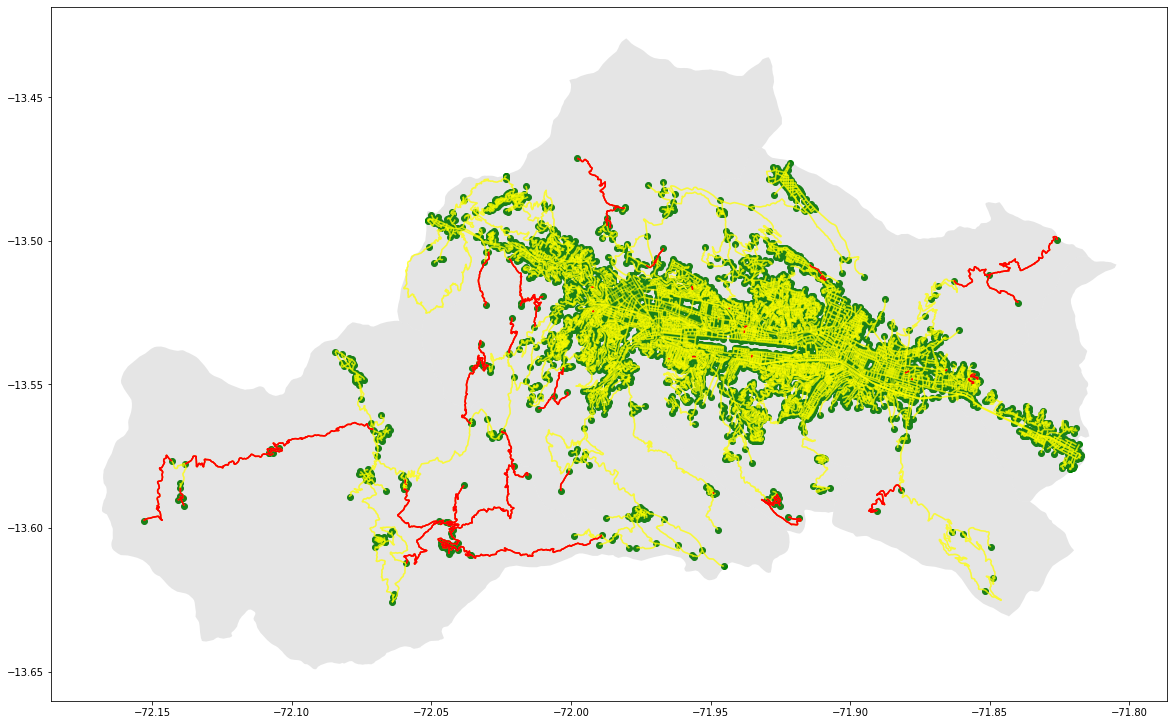

In [1019]:
fig, ax = plt.subplots(figsize=(20,20))

nodes.plot(ax=ax, color='g')
edges.plot(ax=ax, color='yellow', alpha=0.5)
cuscoshape.plot(ax=ax, color='gray', alpha=0.2)
inputdf.plot(ax=ax, color='red')

In [1020]:
edges2_wazeinfo.to_csv("data/GrafoCusco_edgeswaze1400.csv", index=False)

In [ ]:
%%time
edges2_wazeinfo = pd.read_csv("data/GrafoCusco_edgeswaze.csv", index_col=[0,1,2])
edges2_wazeinfo['geometry'] = edges2_wazeinfo['geometry'].apply(wkt.loads)
edges2_wazeinfo = gpd.GeoDataFrame(edges2_wazeinfo, crs='epsg:4326')
edges2_wazeinfo.head()

# Agregamos información de Waze a los edges del Grafo Cusco

In [937]:
# edges.head()

In [935]:
edges2_wazeinfo.head(2)

,u,v,key,osmid,name,highway,oneway,length,geometry,lanes,maxspeed,junction,ref,access,width,bridge,wazeinfo_minutes,wazeinfo_km,wazeinfo
0,30962246,3707257935,0,"[885654808, 4818990, 885654806]",Avenida Velasco Astete,trunk,False,267.284,"LINESTRING (-71.94544 -13.53886, -71.94500 -13...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,0.248,"(0.6, 0.248)"
1,30962246,30962247,0,893177331,Avenida Velasco Astete,trunk,True,25.109,"LINESTRING (-71.94544 -13.53886, -71.94561 -13...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033333,0.018,"(0.03333333333333333, 0.018)"


In [ ]:
print(edges.shape)

In [ ]:
edges = edges.merge(edges2_wazeinfo[['wazeinfo_minutes', 'wazeinfo_km']],
            how='inner',
            left_index=True,
            right_index=True
           )
print(edges.shape)

In [ ]:
edges.head(3)

In [ ]:
# type(graph)

In [ ]:
len(set(edges.index))

In [ ]:
print(nx.info(graph))

In [ ]:
# ox.basic_stats(graph)

In [ ]:
route_wkm = ox.shortest_path(graph, 30962246, 11047357300,weight='wazeinfo_km')
route_wmin = ox.shortest_path(graph, 30962246, 11047357300,weight='wazeinfo_minutes')
route = ox.shortest_path(graph, 30962246, 11047357300)


In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
# nodes.plot(ax=ax, color='g')
# edges.plot(ax=ax, color='yellow', alpha=0.5)
cuscoshape.plot(ax=ax, color='gray', alpha=0.2)
fig, ax = ox.plot_graph_route(graph, route, route_color='red', ax=ax )
# fig, ax = ox.plot_graph_route(graph, route_wkm, route_color='blue', ax=ax )
# plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
# nodes.plot(ax=ax, color='g')
# edges.plot(ax=ax, color='yellow', alpha=0.5)
cuscoshape.plot(ax=ax, color='gray', alpha=0.2)
ox.plot_graph_route(graph, route_wkm, route_color='blue', ax=ax )

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
# nodes.plot(ax=ax, color='g')
# edges.plot(ax=ax, color='yellow', alpha=0.5)
cuscoshape.plot(ax=ax, color='gray', alpha=0.2)
ox.plot_graph_route(graph, route_wmin, route_color='black', ax=ax )

In [ ]:
nx.is_directed(graph)

In [ ]:
# ox.shortest_path(graph, 30962246, 11047357300, weight='wazeinfo_minutes')

# Save Graph

In [1201]:
!ls -l data

total 60332
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup  7834805 jul 31 23:23 EdgesCusco_wazeinfo.csv
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup  6769459 ago  8 21:43 GrafoCusco_edges.csv
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup  7839841 ago 12 10:45 GrafoCusco_edgeswaze0800.csv
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup  7835767 ago 13 10:07 GrafoCusco_edgeswaze1400.csv
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup  7834805 ago  8 21:45 GrafoCusco_edgeswaze.csv
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup   730523 ago  8 21:43 GrafoCusco_nodes.csv
-rw-r--r-- 1 leibnitz.rojas hadoopgroup  5459968 ago  9 22:44 GrafoCuscoWaze.gpkg
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup 11372052 ago  9 22:29 GrafoCuscoWaze.graphml
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup  1694626 may 24 21:53 RutasCusco.csv
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup  4389423 jul 24 07:54 RutasCusco_snap_CuscoNodes.csv


In [1202]:
G_transporte_nodes.head(2)

,y,x,street_count,highway,geometry
osmid,,,,,
4427153413,-13.552679,-71.876854,2,NaN,POINT (-71.87685 -13.55268)
10232315911,-13.521048,-71.952889,3,NaN,POINT (-71.95289 -13.52105)


In [1203]:
G_transporte_edges.head(3)

osmid               name      highway  \
u           v          key                                              
10232315911 30970895   0    316326176  Avenida Collasuyo    secondary   
            472615572  0    316326176  Avenida Collasuyo    secondary   
10803871753 5601181487 0    586164384                NaN  residential   

                           maxspeed  oneway   length  \
u           v          key                             
10232315911 30970895   0         40   False    9.202   
            472615572  0         40   False   85.249   
10803871753 5601181487 0        NaN   False  142.060   

                                                                     geometry  \
u           v          key                                                      
10232315911 30970895   0    LINESTRING (-71.95289 -13.52105, -71.95297 -13...   
            472615572  0    LINESTRING (-71.95289 -13.52105, -71.95233 -13...   
10803871753 5601181487 0    LINESTRING (-71.98694 -13.54986, -71.98684 -13...   

                           lanes width  ref bridge access junction  \
u           v          key                                           
10232315911 30970895   0     NaN   NaN  NaN    NaN    NaN      NaN   
            472615572  0     NaN   NaN  NaN    NaN    NaN      NaN   
10803871753 5601181487 0     NaN   NaN  NaN    NaN    NaN      NaN   

                            wazeinfo_km  wazeinfo_minutes  
u           v          key                                 
10232315911 30970895   0          0.008          0.016667  
            472615572  0          0.085          0.200000  
10803871753 5601181487 0          0.138          0.400000

In [ ]:
%%time
ox.save_graph_geopackage(graph, 'data/GrafoCuscoWaze.gpkg', )

In [ ]:
!mv data/GrafoCuscoWaze data/GrafoCuscoWaze.gpkg

# Amenities

In [1149]:
%%time
place_name = ["Provincia de Cusco, Cusco, Peru"]

amenities = ox.geometries_from_place(place_name, which_result=1 ,tags={'amenity':True} )
amenities.head(2)

CPU times: user 3.79 s, sys: 58.5 ms, total: 3.84 s
Wall time: 3.84 s


,unique_id,osmid,element_type,amenity,compressed_air,name,opening_hours,geometry,check_date,denomination,...,roof:shape,smoothness,surface,layer,contact:pinterest,contact:youtube,full_name,orientation,ways,type
0,node/441195928,441195928,node,fuel,yes,PRIMAX,Mo-Su 00:00-12:00,POINT (-71.91249 -13.53332),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node/441195940,441195940,node,fuel,yes,REPSOL,Mo-Sa 00:00-12:00,POINT (-71.91688 -13.53205),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1150]:
amenities.shape

(2530, 202)

In [1151]:
%%time
from shapely.geometry import Point
amenities['isPoint'] = amenities.apply(lambda x: type(x.geometry) is Point , axis=1)
amenities.rename(columns={'geometry':'geometry_polygon'}, inplace=True)
amenities['geometry'] = amenities.apply(lambda x: x['geometry_polygon'].centroid, axis=1)
amenities.set_geometry('geometry')
amenities.set_index('osmid', inplace=True)
amenities.head(2)

CPU times: user 751 ms, sys: 0 ns, total: 751 ms
Wall time: 749 ms


,unique_id,element_type,amenity,compressed_air,name,opening_hours,geometry_polygon,check_date,denomination,religion,...,surface,layer,contact:pinterest,contact:youtube,full_name,orientation,ways,type,isPoint,geometry
osmid,,,,,,,,,,,,,,,,,,,,,
441195928,node/441195928,node,fuel,yes,PRIMAX,Mo-Su 00:00-12:00,POINT (-71.91249 -13.53332),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-71.91249 -13.53332)
441195940,node/441195940,node,fuel,yes,REPSOL,Mo-Sa 00:00-12:00,POINT (-71.91688 -13.53205),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-71.91688 -13.53205)


## Amenities y su node mas cercano en el subgrafo de transporte

In [1152]:
%%time
logger.info("Proceso SNAP Inicio")
amenities_Gtransporte = gn.pandana_snap_points(amenities, G_transporte_nodes)
logger.info("Proceso SNAP Fin")

2023-08-16 19:45:50,181 :: INFO :: MAIN :: 3763 :: Proceso SNAP Inicio
2023-08-16 19:45:50 :: INFO :: MAIN :: 3763 :: Proceso SNAP Inicio
/home/leibnitz.rojas/.local/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6

/home/leibnitz.rojas/.local/lib/python3.6/site-packages/pyproj/crs/crs.py:294: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6

/home/leibnitz.rojas/.local/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the 

CPU times: user 12min 24s, sys: 7.22 s, total: 12min 31s
Wall time: 12min 31s


In [1156]:
amenities_Gtransporte.rename(columns={'NN':'gtransporte_osmid', 'NN_dist':'gtransporte_dist' }, inplace=True)
amenities_Gtransporte.head(3)

,unique_id,element_type,amenity,compressed_air,name,opening_hours,geometry_polygon,check_date,denomination,religion,...,contact:pinterest,contact:youtube,full_name,orientation,ways,type,isPoint,geometry,gtransporte_osmid,gtransporte_dist
osmid,,,,,,,,,,,,,,,,,,,,,
441195928,node/441195928,node,fuel,yes,PRIMAX,Mo-Su 00:00-12:00,POINT (-71.91249 -13.53332),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-71.91249 -13.53332),3241267614,0.000392
441195940,node/441195940,node,fuel,yes,REPSOL,Mo-Sa 00:00-12:00,POINT (-71.91688 -13.53205),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-71.91688 -13.53205),441195936,0.000138
444056852,node/444056852,node,toilets,NaN,NaN,NaN,POINT (-71.98931 -13.52465),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-71.98931 -13.52465),444056854,0.000770


<AxesSubplot:>

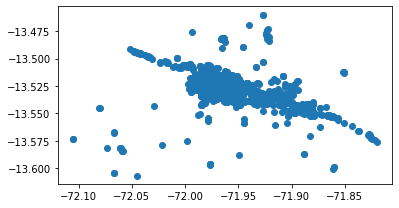

In [1155]:
amenities_Gtransporte.plot()

In [1160]:
# amenities

In [1165]:
# np.sort(amenities['amenity'].unique())
amenities_Gtransporte.head()

,unique_id,element_type,amenity,compressed_air,name,opening_hours,geometry_polygon,check_date,denomination,religion,...,contact:pinterest,contact:youtube,full_name,orientation,ways,type,isPoint,geometry,gtransporte_osmid,gtransporte_dist
osmid,,,,,,,,,,,,,,,,,,,,,
441195928,node/441195928,node,fuel,yes,PRIMAX,Mo-Su 00:00-12:00,POINT (-71.91249 -13.53332),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-71.91249 -13.53332),3241267614,0.000392
441195940,node/441195940,node,fuel,yes,REPSOL,Mo-Sa 00:00-12:00,POINT (-71.91688 -13.53205),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-71.91688 -13.53205),441195936,0.000138
444056852,node/444056852,node,toilets,NaN,NaN,NaN,POINT (-71.98931 -13.52465),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-71.98931 -13.52465),444056854,0.000770
444056860,node/444056860,node,toilets,NaN,NaN,NaN,POINT (-71.98682 -13.52673),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-71.98682 -13.52673),30985790,0.000541
444056873,node/444056873,node,place_of_worship,NaN,Iglesia de Nuestra Señora de Belén,NaN,POINT (-71.98132 -13.52721),2023-08-04,catholic,christian,...,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-71.98132 -13.52721),30983330,0.000416


In [1166]:
cond = amenities_Gtransporte['amenity'] == 'bank'
cols = ['unique_id', 'osmid', 'element_type', 'amenity', 'name',  'geometry',]
amenities_Gtransporte.loc[cond, : ].head(2)

,unique_id,element_type,amenity,compressed_air,name,opening_hours,geometry_polygon,check_date,denomination,religion,...,contact:pinterest,contact:youtube,full_name,orientation,ways,type,isPoint,geometry,gtransporte_osmid,gtransporte_dist
osmid,,,,,,,,,,,,,,,,,,,,,
966049990,node/966049990,node,bank,NaN,InterBank,Mo-Fr 09:00-18:00; Sa 09:00-13:00,POINT (-71.97721 -13.51992),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-71.97721 -13.51992),3738278158,0.000670
966357605,node/966357605,node,bank,NaN,Banco de la Nación,Mo-Fr 08:30-15:30; Sa 09:00-13:00,POINT (-71.97814 -13.51884),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-71.97814 -13.51884),30983435,0.000258


In [1138]:
cols = ['wazeinfo_km', 'wazeinfo_minutes']
G_transporte_edges = G_transporte_edges.merge(edges[cols], 
                                              how='inner', 
                                              left_index=True, 
                                              right_index=True )

In [1182]:
nodes2plot = amenities_Gtransporte.loc[cond, 'gtransporte_osmid' ].unique()

In [1186]:
# nodes.loc[nodes2plot,:]

<AxesSubplot:>

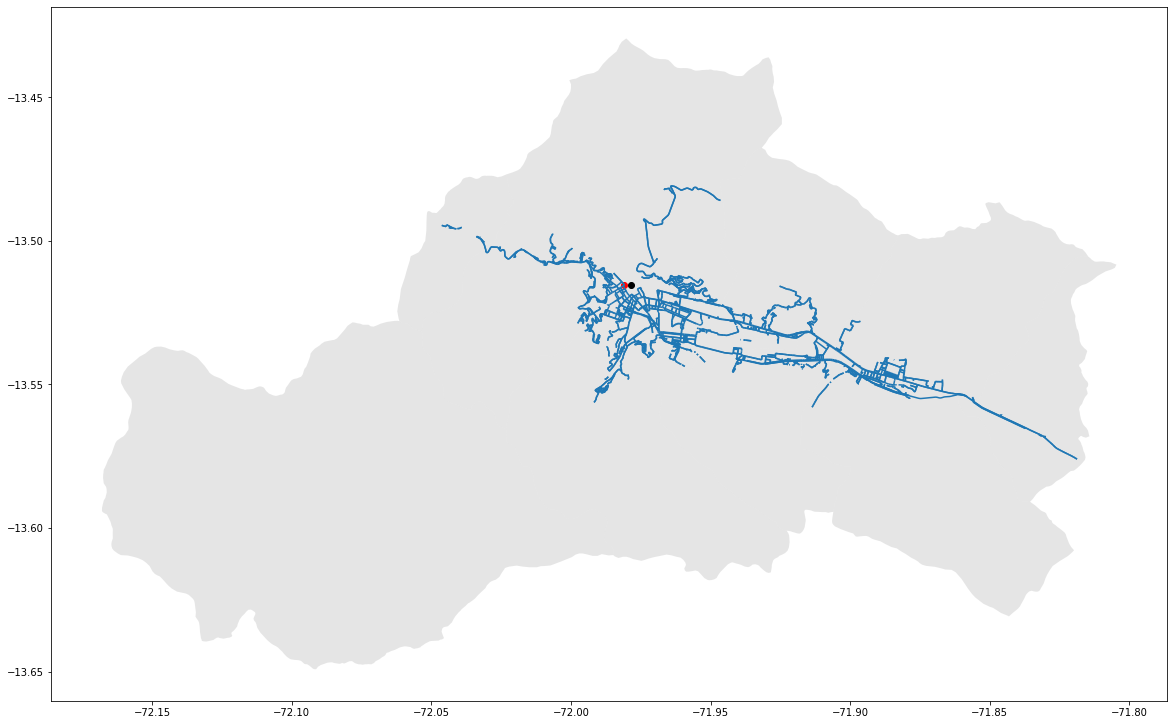

In [1190]:
fig, ax = plt.subplots(figsize=(20,20))

# nodes.plot(ax=ax, color='g')
# edges.plot(ax=ax, color='yellow', alpha=0.5)
G_transporte_edges.plot(ax=ax)
cuscoshape.plot(ax=ax, color='gray', alpha=0.2)
# rutascuscounique_gnodes.plot(ax=ax) 
# inputdf.plot(ax=ax, color='red')

cond = amenities_Gtransporte['amenity'] == 'school'
# amenities_cols = ['unique_id', 'osmid', 'element_type', 'amenity', 'name',  'geometry',]
# amenities.loc[cond, amenities_cols ].head(2)
# amenities_Gtransporte.loc[cond, :].plot(ax=ax, color='black', )
amenities_Gtransporte.loc[[874430122], :].plot(ax=ax, color='black', )

# nodes.loc[nodes2plot,:].plot(ax=ax, color='red')
nodes.loc[[30972890],:].plot(ax=ax, color='red')



In [1188]:
amenities_Gtransporte.loc[cond, :]

,unique_id,element_type,amenity,compressed_air,name,opening_hours,geometry_polygon,check_date,denomination,religion,...,contact:pinterest,contact:youtube,full_name,orientation,ways,type,isPoint,geometry,gtransporte_osmid,gtransporte_dist
osmid,,,,,,,,,,,,,,,,,,,,,
874430122,node/874430122,node,school,NaN,Institución Educativa 51015 San Francisco de B...,NaN,POINT (-71.97866 -13.51536),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-71.97866 -13.51536),30972890,0.002216
965378786,node/965378786,node,school,NaN,Escuela San Cristobal,NaN,POINT (-71.97908 -13.51306),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-71.97908 -13.51306),30972890,0.002870
966364311,node/966364311,node,school,NaN,Institución Educativa Maria Auxiliadora,NaN,POINT (-71.97760 -13.51448),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-71.97760 -13.51448),30983949,0.002743
1003782710,node/1003782710,node,school,NaN,Institución Educativa Privada José María Arguedas,NaN,POINT (-71.96110 -13.53053),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-71.96110 -13.53053),30970702,0.000418
1004136865,node/1004136865,node,school,NaN,I.E.M.Revolucionaria Santa Rosa,NaN,POINT (-71.92522 -13.53496),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-71.92522 -13.53496),10780889226,0.000707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925250122,way/925250122,way,school,NaN,Institución Educativa El Nazareno,NaN,"POLYGON ((-71.95083 -13.52739, -71.95094 -13.5...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,POINT (-71.95092 -13.52733),2640595370,0.000652
964418790,way/964418790,way,school,NaN,Institución Educativa 51023 San Luis Gonzaga,NaN,"POLYGON ((-71.88215 -13.54483, -71.88235 -13.5...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,POINT (-71.88257 -13.54504),7498321732,0.000514
1006001380,way/1006001380,way,school,NaN,Institución Educativa Caminito Del Peru,NaN,"POLYGON ((-71.94896 -13.53059, -71.94883 -13.5...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,POINT (-71.94890 -13.53066),30964727,0.001178


In [1207]:
G_transporte_nodes.to_csv("data/GrafoCuscoTransporte0800_nodes.csv")

In [1206]:
G_transporte_edges.to_csv("data/GrafoCuscoTransporte0800_edges.csv")

In [1208]:
amenities_Gtransporte.to_csv("data/AmenitiesGrafoTransporte.csv")